# Imports

In [1]:
from pyiron import Project
from pyiron_dpd.contrib import SegregationFlow

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pr = Project('DPD')

In [4]:
pr.inspect_emperical_potentials().find(['Cu', 'Ag']).head(5)

,Config,Filename,Model,Name,Species,Citations
3,"[pair_style eam\n, pair_coeff 1 1 Ag_u3.eam\n,...",[potential_LAMMPS/1986--Foiles-S-M--Ag-Au-Cu-N...,NISTiprpy,1986--Foiles-S-M--Ag-Au-Cu-Ni-Pd-Pt--LAMMPS--ipr1,"[Ag, Au, Cu, Ni, Pd, Pt]",[{'Foiles_1986': {'title': 'Embedded-atom-meth...
21,"[pair_style eam\n, pair_coeff 1 1 agu6.txt\n, ...",[potential_LAMMPS/1989--Adams-J-B--Ag-Au-Cu-Ni...,NISTiprpy,1989--Adams-J-B--Ag-Au-Cu-Ni-Pd-Pt--LAMMPS--ipr1,"[Ag, Au, Cu, Ni, Pd, Pt]",[{'Adams_1989': {'title': 'Self-diffusion and ...
93,"[pair_style eam/alloy\n, pair_coeff * * CuAgAu...",[potential_LAMMPS/2004--Zhou-X-W--Cu-Ag-Au--LA...,NISTiprpy,2004--Zhou-X-W--Cu-Ag-Au--LAMMPS--ipr2,"[Cu, Ag, Au]",[{'Zhou_2004': {'title': 'Misfit-energy-increa...
122,"[pair_style eam/alloy\n, pair_coeff * * CuAg.e...",[potential_LAMMPS/2006--Williams-P-L--Cu-Ag--L...,NISTiprpy,2006--Williams-P-L--Cu-Ag--LAMMPS--ipr1,"[Cu, Ag]",[{'Williams_2006': {'title': 'An embedded-atom...
155,"[pair_style meam\n, pair_coeff * * library.mea...",[potential_LAMMPS/2009--Kang-K-H--Cu-Ag--LAMMP...,NISTiprpy,2009--Kang-K-H--Cu-Ag--LAMMPS--ipr1,"[Ag, Cu]",[{'Kang_2009': {'title': 'Atomistic modeling o...


In [5]:
potential = '2006--Williams-P-L--Cu-Ag--LAMMPS--ipr1'

# Vacancy Example

We'll calculate the segregation of Ag to a Cu vacancy.

## Create Structure

In [6]:
bulk = pr.create.structure.bulk('Cu', cubic=True)
vac_structure = bulk.repeat(4)
del vac_structure[100]

In [7]:
bulk.repeat(2).plot3d()

NGLWidget()

## Setup

In [8]:
vac = SegregationFlow(pr, 'CuAg_Vacancy')

In [9]:
vac.structure = vac_structure

Automatically detect likely segregation sites with ACE descriptors.

In [10]:
locations = vac.suggest_sites(12);
locations

/u/system/SLES12/soft/pyiron/dev/anaconda3/lib/python3.8/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)


{'A': 100,
 'B': 86,
 'C': 87,
 'D': 97,
 'E': 37,
 'F': 22,
 'G': 83,
 'H': 33,
 'I': 102,
 'J': 101,
 'K': 99,
 'L': 38}

In [11]:
vac.locations = locations
vac.plot_sites()

NGLWidget()

In [12]:
vac.max_order = len(vac.locations)

In [13]:
vac.segregant = 'Ag'
vac.potential = potential
vac.jobtype = 'Lammps'

In [14]:
vac.repeats = [(1,1,1)]

In [15]:
vac.normalization = 1
vac.normalization_unit = ""

## Create Segregation States

In [16]:
vac.run_time = 15 * 60

In [17]:
vac.run()

Running Jobs:   0%|          | 0/140 [00:00<?, ?it/s]

## Analyze

In [18]:
vac.project.get_jobs_status()

status
finished    143
Name: count, dtype: int64

In [19]:
df = vac.analyze()

Loading and filtering jobs: 0it [00:00, ?it/s]

/u/zora/software/pyiron_base/pyiron_base/jobs/datamining.py:636: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['majority_element', 'minority_element_list', 'sites'], dtype='object')]

  self.pyiron_table._df.to_hdf(


## Plot DPDs

Loading and filtering jobs: 0it [00:00, ?it/s]

/u/zora/software/pyiron_base/pyiron_base/jobs/datamining.py:636: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['majority_element', 'minority_element_list', 'sites'], dtype='object')]

  self.pyiron_table._df.to_hdf(


Text(0, 0.5, 'Formation Energy [eV]')

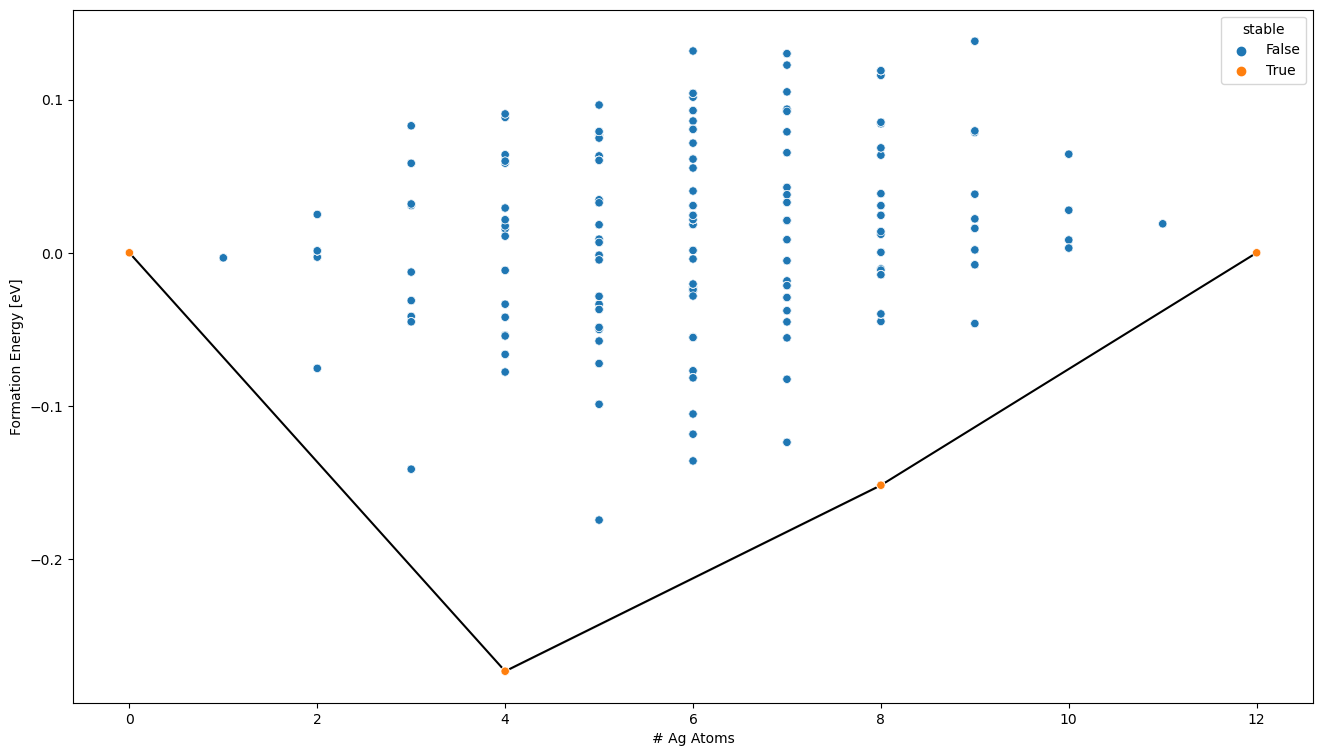

In [20]:
vac.plot_excess_energies();
plt.xlabel('# Ag Atoms')
plt.ylabel('Formation Energy [eV]')

Loading and filtering jobs: 0it [00:00, ?it/s]

/u/zora/software/pyiron_base/pyiron_base/jobs/datamining.py:636: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['majority_element', 'minority_element_list', 'sites'], dtype='object')]

  self.pyiron_table._df.to_hdf(


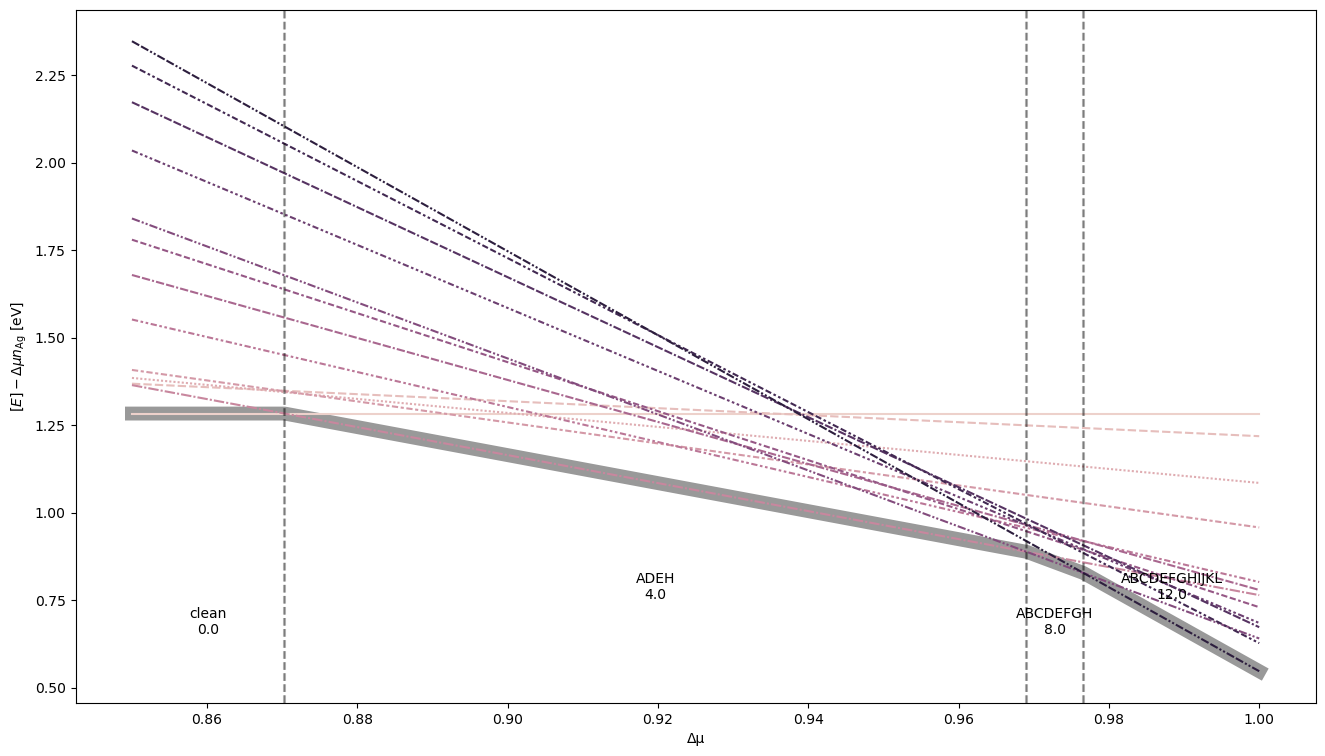

In [21]:
vac.plot_defect_phase_diagram(chem_pot=np.linspace(0.85,1,1000))
plt.ylabel('$[E] - \Delta\mu n_\mathrm{Ag}$ [eV]');

Loading and filtering jobs: 0it [00:00, ?it/s]

/u/zora/software/pyiron_base/pyiron_base/jobs/datamining.py:636: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['majority_element', 'minority_element_list', 'sites'], dtype='object')]

  self.pyiron_table._df.to_hdf(


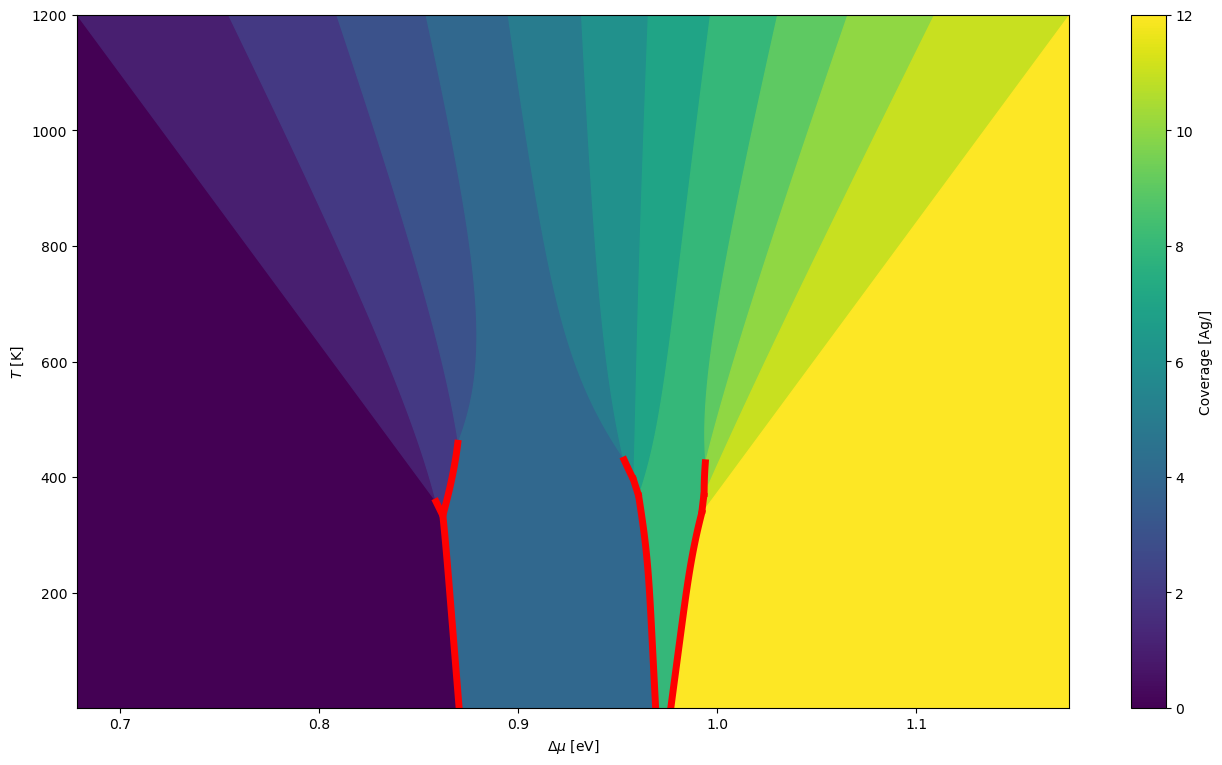

In [22]:
vac.plot_defect_phase_diagram_free(temperatures=np.linspace(1, 1200, 250));

In [23]:
stab = vac.get_stable_patterns(vac.get_chem_pot_data(chem_pot=np.linspace(0.85,1,1000)), include_structures=True)

Loading and filtering jobs: 0it [00:00, ?it/s]

/u/zora/software/pyiron_base/pyiron_base/jobs/datamining.py:636: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['majority_element', 'minority_element_list', 'sites'], dtype='object')]

  self.pyiron_table._df.to_hdf(


In [24]:
stab

,,coverage,job_id,structure
sites,repeat,,,
clean,1,0.0,19738259,"[element: [None, AtomicNumber 29\nAtomicRadius 145.0\nAtomicMass 63.546001\nColor Copper\nCovalentRadius ..."
ADEH,1,4.0,19738291,"[element: [None, AtomicNumber 29\nAtomicRadius 145.0\nAtomicMass 63.546001\nColor Copper\nCovalentRadius ..."
ABCDEFGH,1,8.0,19738368,"[element: [None, AtomicNumber 29\nAtomicRadius 145.0\nAtomicMass 63.546001\nColor Copper\nCovalentRadius ..."
ABCDEFGHIJKL,1,12.0,19738401,"[element: [None, AtomicNumber 29\nAtomicRadius 145.0\nAtomicMass 63.546001\nColor Copper\nCovalentRadius ..."


In [25]:
s = stab.iloc[2].structure
s.plot3d()

NGLWidget()